# Oppg 12, data fra R fil

In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
mu = 0       # Set overall mean
sigma2_t = 1 # Set variance component for treatment
sigma2 = 1   # Set variance component for error
a = 5        # Number of treatments
n = 8        # Number of replicates

alpha = 0.05 # Significance level

t = np.random.normal(mu, sigma2_t**0.5, a)
e = np.random.normal(mu, sigma2**0.5, a*n)

# GJØRES SENERE, MYE JOBB, UNØDVENIDG JOBB

# oppg 13, tilbake til sires, men skal nå regne dem som 5 'random idividuals from a large population of sires'

In [54]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
from statsmodels.formula.api import mixedlm


In [55]:
sires = pd.read_csv('SiresData.csv', sep=';')
model_4_anova = ols('Milk~ C(Sire)', data=sires).fit()
model = mixedlm('Milk~ C(Sire)',groups='Sire', data=sires).fit()
anova_table = sm.stats.anova_lm(model_4_anova)
print(anova_table)
print(model.summary())

            df      sum_sq        mean_sq         F    PR(>F)
C(Sire)    4.0  1251009.35  312752.337500  2.805913  0.040379
Residual  35.0  3901165.75  111461.878571       NaN       NaN
                 Mixed Linear Model Regression Results
Model:                  MixedLM     Dependent Variable:     Milk       
No. Observations:       40          Method:                 REML       
No. Groups:             5           Scale:                  111461.8786
Min. group size:        8           Log-Likelihood:         -258.2366  
Max. group size:        8           Converged:              Yes        
Mean group size:        8.0                                            
-----------------------------------------------------------------------
               Coef.        Std.Err.      z    P>|z|   [0.025   0.975] 
-----------------------------------------------------------------------
Intercept      6689.250         354.111 18.890 0.000  5995.205 7383.295
C(Sire)[T.2]   -407.250         500.789

In [4]:
ms_tr = anova_table['mean_sq'][0]
ms_e = anova_table['mean_sq'][1]
F0 = ms_tr/ms_e
df_tr = anova_table['df'][0]
df_e = anova_table['df'][1]
alpha = 0.05
f_alpha = stats.f.ppf(1-alpha, df_tr, df_e)
print(f'Med et signifikansnivå på {alpha}, får vi en f_alpha på {round(f_alpha, 3)}.\n'
     f'F0 er på {round(F0,3)}\n'
     f'Dermed så blir forkastning = {F0 > f_alpha}')

Med et signifikansnivå på 0.05, får vi en f_alpha på 2.641.
F0 er på 2.806
Dermed så blir forkastning = True


# Estimer alle parameterene i modellen

In [5]:
mu = sires['Milk'].mean()
ms_tr = anova_table['mean_sq'][0]
ms_e = anova_table['mean_sq'][1]
sigma2 = ms_e
sigma2_t = (ms_tr-ms_e)/8
print(f'Mu: {mu}\nSigma2: {round(sigma2,2)}\nSigma2_t: {round(sigma2_t,2)}')

Mu: 6518.15
Sigma2: 111461.88
Sigma2_t: 25161.31


# Finn et 95% CI for 'overal mean' og 'error variance'

In [11]:
alpha = 0.05
chi_square_left = stats.chi2.isf(alpha/2, df_e)
chi_square_right = stats.chi2.ppf(alpha/2, df_e)
CI_error = [(df_e*ms_e)/chi_square_left, (df_e*ms_e)/chi_square_right]
print(f'Konfidensintervallet for "error variance" er:\n{CI_error}')

Konfidensintervallet for "error variance" er:
[73325.56797465835, 189658.9196664783]


# Estimer 'interclass correlation' (eller 'interclass correlation coefficient' (CCI)) og finn et 90% CI

In [53]:
mean = mu
alpha = 0.05
df = df_tr
t_alpha = stats.t.ppf((1+1-alpha)/2, df)
a = 5
n = 8
se_mean = (ms_tr/(a*n))**0.5
CI_mean = [mean-(t_alpha*se_mean), mean+(t_alpha*se_mean)]
print(f'Konfidensintervallet for "overal mean" er:\n{CI_mean}')
print(t_alpha, se_mean)

Konfidensintervallet for "overal mean" er:
[6272.645544834256, 6763.6544551657435]
2.7764451051977987 88.42402635879021


## CCI reflekterer andelen av variansen av en observasjon som er resultatet av forskjellen mellom behandlingene (MÅ FINNE EN BEDRE FORKLARING ENN DETTE...!!!!)

## CCI er mellom 1 og 0 og vi finner approkimasjonen av CCI ved å gjøre dette

In [12]:
sigma2 = ms_e
sigma2_t = (ms_tr-ms_e)/8
CCI = sigma2_t/(sigma2_t+sigma2)
print(f'Dette er estimatet for CCI: {CCI}')

Dette er estimatet for CCI: 0.18416571970135354


In [13]:
n = 8
alpha = 0.1
f_alpha_U = stats.f.ppf(alpha/2, df_tr, df_e)
f_alpha_L = stats.f.isf(alpha/2, df_tr, df_e)
L = (1/n)*((ms_tr/ms_e)*(1/f_alpha_L)-1)
U = (1/n)*((ms_tr/ms_e)*(1/f_alpha_U)-1)
CI_CCI = [L/(1+L), U/(1+U)]
print(f'Konfidensintervallet for CCI er:\n{CI_CCI}')

Konfidensintervallet for CCI er:
[0.00772194482056908, 0.6533233033432835]


In [14]:
# 95% CI
f_alpha_U = stats.f.ppf(0.05/2, df_tr, df_e)
f_alpha_L = stats.f.isf(0.05/2, df_tr, df_e)
L = (1/n)*((ms_tr/ms_e)*(1/f_alpha_L)-1)
U = (1/n)*((ms_tr/ms_e)*(1/f_alpha_U)-1)
CI_CCI = [L/(1+L), U/(1+U)]
print(f'Konfidensintervallet for CCI er:\n{CI_CCI}')

Konfidensintervallet for CCI er:
[-0.014870697996370445, 0.7390855539064741]


### Når man bruker et 95% CI så kommer man under 0, som ikke er et oppnåelig tall (fordi CCI kan bare ligge mellom 0 og 1) 

# OPPG 14, Beefcarcasses, INTERACTION

In [1]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import researchpy as rp

In [2]:
beef = pd.read_csv('Beefcarcasses.csv', sep=';', decimal=',')

In [3]:
summary_cont = rp.summary_cont(beef.groupby(['Gender', 'Breed'])['KFactor'])

### Finn ut om det er noe 'interaction'

In [4]:
model = ols('KFactor ~ Gender * Breed', data=beef).fit()
anova_table = sm.stats.anova_lm(model)
print(anova_table)

                df     sum_sq    mean_sq          F        PR(>F)
Gender         1.0   4.248510   4.248510  29.385833  9.012233e-07
Breed          2.0  22.914767  11.457383  79.247720  2.851685e-18
Gender:Breed   2.0   0.297809   0.148904   1.029933  3.626971e-01
Residual      66.0   9.542070   0.144577        NaN           NaN


In [5]:
SST = 0
SSA = 0
SSB = 0
SSAB = 0
SSE = 0
for i in range(4):
    SST += anova_table['sum_sq'][i]
    if i == 0:
        SSA = anova_table['sum_sq'][i]
    if i == 1:
        SSB = anova_table['sum_sq'][i]
    if i == 2:
        SSAB = anova_table['sum_sq'][i]
    if i == 3:
        SSE = anova_table['sum_sq'][i]

print(f'SST: {SST}\nSSA: {SSA}\nSSB: {SSB}\nSSAB: {SSAB}\nSSE: {SSE}')

SST: 37.00315627959843
SSA: 4.248510345896551
SSB: 22.914766963576337
SSAB: 0.29780879828485074
SSE: 9.542070171840692


## Lag et plot med KFactor som response og Breed på x-aksen

In [6]:
import matplotlib.pyplot as plt

In [7]:
names = ['Holstein', 'Limousin', 'NRF']
mean_bull = [summary_cont['Mean'][i] for i in range(3)]
mean_cow = [summary_cont['Mean'][i] for i in range(3,6)]
summary_cont

N    Mean      SD      SE  95% Conf.  Interval
Gender Breed                                                    
Bull   Holstein  12  3.1583  0.2617  0.0755     2.9921    3.3246
       Limousin  12  4.3199  0.4331  0.1250     4.0447    4.5950
       NRF       12  3.3972  0.4541  0.1311     3.1087    3.6858
Cow    Holstein  12  2.5804  0.3705  0.1069     2.3450    2.8157
       Limousin  12  4.0160  0.4904  0.1416     3.7044    4.3275
       NRF       12  2.8216  0.1659  0.0479     2.7162    2.9270

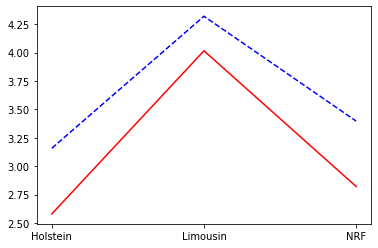

In [8]:
plt.plot(names, mean_bull, 'b--', names, mean_cow, 'r-')

## oppg 14e) find SSt, SSa, SSb og SSe, fjerner sammenligningsdelen

In [9]:
model = ols('KFactor ~ Gender + Breed', data=beef).fit()
anova_table = sm.stats.anova_lm(model)
print(anova_table)

            df     sum_sq    mean_sq          F        PR(>F)
Gender     1.0   4.248510   4.248510  29.359985  8.538879e-07
Breed      2.0  22.914767  11.457383  79.178014  1.747321e-18
Residual  68.0   9.839879   0.144704        NaN           NaN


In [10]:
SS_A = anova_table['sum_sq'][0]
SS_B = anova_table['sum_sq'][1]
SS_E = anova_table['sum_sq'][2]
SS_T = SS_A + SS_B + SS_E

In [13]:
print(f'SSa: {round(SS_A,2)}\nSSb: {round(SS_B,2)}\nSSe: {round(SS_E,2)}\nSST: {round(SS_T,2)}')

SSa: 4.25
SSb: 22.91
SSe: 9.84
SST: 37.0
